In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,7000
1,Michael,29,9000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


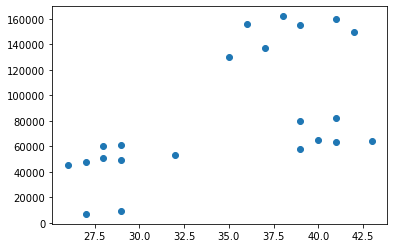

In [3]:
plt.scatter(df['Age'],df['Income($)'])

In [4]:
# We can assume k = 3
km = KMeans(n_clusters=3,n_init='auto')
km

KMeans(n_clusters=3, n_init='auto')

In [5]:
# we ignore 'Name' column because it's not a numeric col
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted # clueter nums: 0, 1 1nd 2

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [6]:
#assign cluster to respective rows
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,7000,1
1,Michael,29,9000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [10]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [2.80000000e+01, 8.00000000e+03],
       [3.40000000e+01, 5.99615385e+04]])

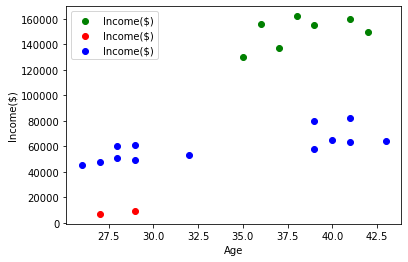

In [7]:
#separate into three df's
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='g',label='Income($)')
plt.scatter(df2['Age'],df2['Income($)'],color='r',label='Income($)')
plt.scatter(df3['Age'],df3['Income($)'],color='b',label='Income($)')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [11]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.000000,1
1,Michael,0.176471,0.012903,1
2,Mohan,0.176471,0.348387,2
3,Ismail,0.117647,0.341935,2
4,Kory,0.941176,0.922581,0


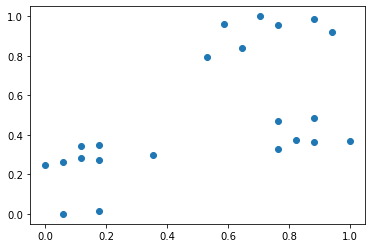

In [12]:
plt.scatter(df.Age,df['Income($)'])

In [15]:
km = KMeans(n_clusters=3,n_init='auto')
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [16]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.000000,0
1,Michael,0.176471,0.012903,0
2,Mohan,0.176471,0.348387,0
3,Ismail,0.117647,0.341935,0
4,Kory,0.941176,0.922581,1


In [17]:
km.cluster_centers_

array([[0.1372549 , 0.2297491 ],
       [0.72268908, 0.92258065],
       [0.85294118, 0.39784946]])

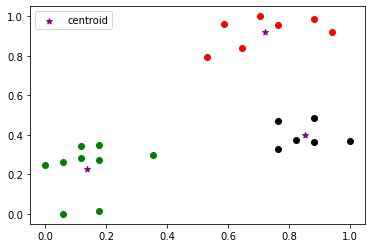

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [20]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k,n_init='auto')
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

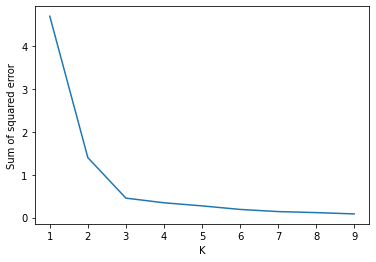

In [22]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
#exercise with iris flower data